<a href="https://colab.research.google.com/github/luizfsjunior/data-science/blob/main/Projeto_predi%C3%A7%C3%A3o_Churn_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pré-processamento de um conjunto de dados:

##1. Faça a leitura do arquivo "Churn_Modelling_2.csv" disponível na pasta "Churn" no repositório GitHub da disciplina e armazene numa variável como um dataframe:

In [2]:
!git clone "https://github.com/malegopc/DSBD"

fatal: destination path 'DSBD' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [4]:
churn = pd.read_csv('DSBD/Datasets/Churn/Churn_Modelling_2.csv', na_values=['?'])
if churn.isnull().values.any()== True:
  print("Há dados vazios")
else:
  print("Não há dados vazios")
churn


Há dados vazios


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3.0,1,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2.0,1,0.0,92888.52,1


##2. Elimine instâncias (linhas) com dados ausentes para a variável "IsActiveMember":

In [5]:
# Mostra o número de dados non-null (não ausentes) e o tipo de cada atributo
print('Informações sobre os dados:\n')
churn.info()
# Soma o número de dados null (ausentes)
print('\n\nSoma de dados null (vazios):\n')
churn.isnull().sum()

Informações sobre os dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    9990 non-null   float64
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   9986 non-null   float64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


Soma de dados null (vazios):



RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts      10
HasCrCard           0
IsActiveMember     14
EstimatedSalary     0
Exited              0
dtype: int64

In [6]:
churn = churn.dropna(inplace = False, subset = ['IsActiveMember'])


##3. Faça a imputação dos dados ausentes para a variável "NumOfProducts" utilizando a média da variável:

In [7]:
churn2 = churn.copy()
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
churn2[['NumOfProducts']] = imputer.fit_transform(churn2[['NumOfProducts']].values)


print('\n\nSoma de dados null (vazios):\n')
churn2.isnull().sum()



Soma de dados null (vazios):



RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##4. Crie uma variável (array) X que contenha os valores apenas dos atributos/colunas de "CreditScore" a "EstimatedSalary" utilizando a função "iloc" do Pandas. Em outras palavras, crie uma variável X que receba o dataframe inteiro exceto as 3 primeiras colunas e a última. Observe que as 3 primeiras colunas "RowNumber", "CustomerId" e "Surname" não são importantes e devem ser descartadas. E a última coluna ("Exited") será a variável destino ("target" ou saída) que será criada no próximo passo:

In [8]:
x = churn2.iloc[:, 3:13].values
print(x)

[[619 'France' 'Female' ... 1 1.0 101348.88]
 [608 'Spain' 'Female' ... 0 1.0 112542.58]
 [502 'France' 'Female' ... 1 0.0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1.0 42085.58]
 [772 'Germany' 'Male' ... 1 0.0 92888.52]
 [792 'France' 'Female' ... 1 0.0 38190.78]]


##5. Crie uma variável (array) y que contenha apenas a última coluna  ("Exited"). Esta é a variável destino ("target" ou saída):

In [9]:
y = churn2['Exited']

##6. Codifique a coluna/variável categórica "Geography" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;

##7. Codifique a coluna/variável categórica "Gender" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;

##8. Após executar o passo 6, transforme os dados da variável "Geography" para a forma binária utilizando a classe OneHotEncoder da biblioteca scikit-learn eliminando redundância, ou seja, aplicando a codificação de variáveis dummy. Observe que há apenas 3 países (categorias) diferentes. Atenção: esse talvez seja o passo mais difícil da tarefa. Você deve transformar o resultado da variável/coluna "Geography" obtido no passo 4 para o formato binário (one-hot) de modo que fique representado por apenas duas colunas (de 0s e 1s). Além disso, essas duas novas colunas devem permanecer na mesma variável X. Dica: verifique a utilização da função make_column_transformer da biblioteca scikit-learn:


In [10]:
enc_geo = OneHotEncoder(drop = 'first', sparse = False)
enc_gen = OneHotEncoder(sparse = False)
ct = make_column_transformer(
      (enc_geo,[1]), (enc_gen,[2]), remainder = 'passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 0.0 1.0 ... 1 1.0 101348.88]
 [0.0 1.0 1.0 ... 0 1.0 112542.58]
 [0.0 0.0 1.0 ... 1 0.0 113931.57]
 ...
 [0.0 0.0 1.0 ... 0 1.0 42085.58]
 [1.0 0.0 0.0 ... 1 0.0 92888.52]
 [0.0 0.0 1.0 ... 1 0.0 38190.78]]


##9. Divida as variáveis X e y em dados de treino e de teste utilizando o método "train_test_split", gerando as variáveis X_train, X_test, y_train e y_test. Você define a proporção de dados de treino e de teste:

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)

(7489, 12)
(2497, 12)


##10. Faça a padronização (escalonamento) dos dados das variáveis X_train e X_test utilizando a classe StandardScaler do scikit-learn:

In [12]:
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [13]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import cross_val_score

model = Sequential()
model.add(Dense(24, input_dim=12, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(12, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(6, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=100, batch_size = 5, validation_data=(x_test, y_test))

Epoch 1/100
1498/1498 [==============================] - 6s 3ms/step - loss: 0.4652 - accuracy: 0.8001 - val_loss: 0.4217 - val_accuracy: 0.8202
Epoch 2/100
1498/1498 [==============================] - 5s 3ms/step - loss: 0.3924 - accuracy: 0.8380 - val_loss: 0.3818 - val_accuracy: 0.8486
Epoch 3/100
1498/1498 [==============================] - 5s 4ms/step - loss: 0.3574 - accuracy: 0.8581 - val_loss: 0.3593 - val_accuracy: 0.8562
Epoch 4/100
1498/1498 [==============================] - 5s 3ms/step - loss: 0.3429 - accuracy: 0.8598 - val_loss: 0.3531 - val_accuracy: 0.8578
Epoch 5/100
1498/1498 [==============================] - 5s 3ms/step - loss: 0.3388 - accuracy: 0.8610 - val_loss: 0.3503 - val_accuracy: 0.8582
Epoch 6/100
1498/1498 [==============================] - 5s 3ms/step - loss: 0.3343 - accuracy: 0.8629 - val_loss: 0.3560 - val_accuracy: 0.8554
Epoch 7/100
1498/1498 [==============================] - 5s 3ms/step - loss: 0.3323 - accuracy: 0.8631 - val_loss: 0.3532 - val_ac

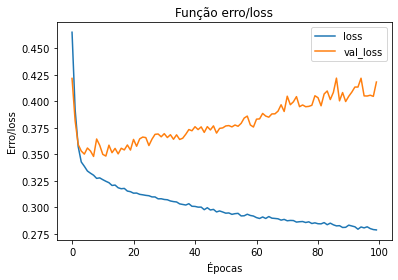

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Épocas")
plt.ylabel('Erro/loss')
plt.title('Função erro/loss')
plt.legend(['loss', 'val_loss'])
plt.show()

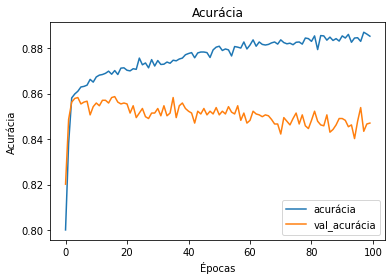

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Épocas")
plt.ylabel('Acurácia')
plt.title('Acurácia')
plt.legend(['acurácia', 'val_acurácia'])
plt.show()

In [18]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1845  143]
 [ 239  270]]


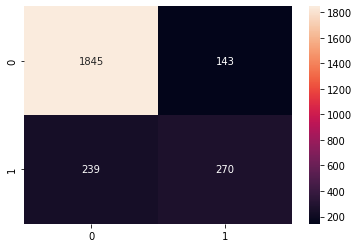

In [20]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")